In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import nltk
import string
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('C:/Users/Dell/Downloads/movie.csv')

In [3]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.shape

(40000, 2)

In [5]:
df.tail()


,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


20019 negative reviews
and 19981 positive reviews

In [6]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.columns

Index(['text', 'label'], dtype='object')

In [8]:
df.nunique()

text     39723
label        2
dtype: int64

In [9]:
df.isnull().sum()

text     0
label    0
dtype: int64

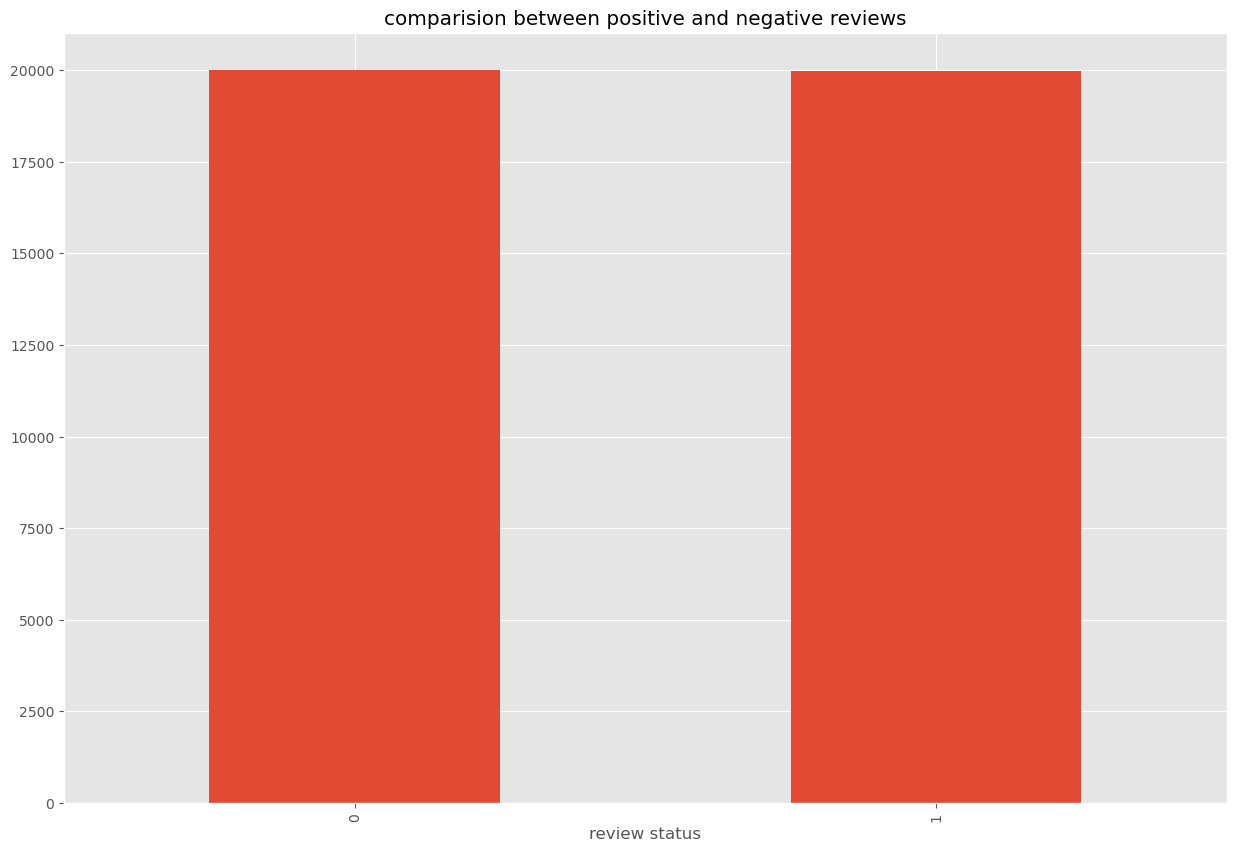

In [10]:
ax=df['label'].value_counts().plot(kind='bar',title='comparision between positive and negative reviews',figsize=(15,10))
ax.set_xlabel('review status')
plt.show()

In [11]:
df['text']=df['text'].str.lower()
df.head()

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [12]:
def removal_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['text']=df['text'].apply(removal_punc)
df.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [13]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

In [14]:
from nltk.tokenize import word_tokenize,sent_tokenize
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    new_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(new_text)
df['text'] = df['text'].apply(remove_stopwords)
df.head()

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1


In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)
df['text'] = df['text'].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label
0,grew b 1965 watching loving thunderbird mate s...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change g...,1


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf_df=tfidf.fit_transform(df['text'])

print('Tfidf_train:',tfidf_df.shape)


Tfidf_train: (40000, 148884)


In [17]:
print(tfidf_df)

  (0, 70484)	0.11658989984724787
  (0, 43863)	0.10355269397583318
  (0, 63730)	0.07299605961952792
  (0, 127113)	0.18385048747813934
  (0, 113859)	0.32545384012715184
  (0, 62495)	0.14502525663814558
  (0, 80898)	0.158489360843239
  (0, 109427)	0.1289138206107335
  (0, 3859)	0.10662692413183056
  (0, 81898)	0.05477646439512654
  (0, 109012)	0.08325180598899778
  (0, 23623)	0.09401405851421224
  (0, 112465)	0.09551099890519461
  (0, 139837)	0.09555578401389322
  (0, 48425)	0.026203223152483177
  (0, 142846)	0.0666972663565852
  (0, 62761)	0.11295271173218369
  (0, 28262)	0.06274465752791343
  (0, 140735)	0.06487946813768206
  (0, 23717)	0.10277812180901874
  (0, 36850)	0.04970055389264208
  (0, 58666)	0.06498157146402027
  (0, 51107)	0.15671281570956197
  (0, 70179)	0.18385048747813934
  (0, 31111)	0.08312259782025325
  :	:
  (39999, 136254)	0.08170353833433472
  (39999, 59803)	0.1656318634810211
  (39999, 15243)	0.06288459899966183
  (39999, 21471)	0.09023057434910699
  (39999, 70039)	

In [18]:
dataframe = pd.DataFrame(tfidf_df[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
dataframe = dataframe.sort_values('TF-IDF', ascending=False)
print(dataframe)

               TF-IDF
thunderbird  0.421804
sapiens      0.325454
school       0.202276
jonatha      0.183850
subsp        0.183850
...               ...
fleabag      0.000000
fleabitten   0.000000
fleadh       0.000000
fleapit      0.000000
כרמון        0.000000

[148884 rows x 1 columns]


In [19]:
df.head()

,text,label
0,grew b 1965 watching loving thunderbird mate s...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change g...,1


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv_text=cv.fit_transform(df['text'])
print('BOW_cv_text:',cv_text.shape)

BOW_cv_text: (40000, 148884)


In [21]:
trani_senti=df['label'][:30000]
test_senti=df['label'][30000:]
print(test_senti.shape)

cv_train_reviews = cv_text[:30000]
cv_test_reviews = cv_text[30000:]
print(cv_train_reviews.shape)

tf_train_reviews =  tfidf_df[:30000]
tf_test_reviews =  tfidf_df[30000:]
print(tf_train_reviews.shape)

(10000,)
(30000, 148884)
(30000, 148884)


In [22]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(max_iter = 1000)

In [23]:
log_reg_cv = model.fit(cv_train_reviews,trani_senti)
log_reg_tf = model.fit(tf_train_reviews,trani_senti)


In [24]:
from sklearn.metrics import accuracy_score
logreg_bow_predict=model.predict(cv_test_reviews)
print(logreg_bow_predict)
logreg_tfidf_predict=model.predict(tf_test_reviews)
print(logreg_tfidf_predict)
logreg_bow_score=accuracy_score(test_senti,logreg_bow_predict)
print("lr_bow_score :",logreg_bow_score)

logreg_tfidf_score=accuracy_score(test_senti,logreg_tfidf_predict)
print("lr_tfidf_score :",logreg_tfidf_score)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]
lr_bow_score : 0.8714
lr_tfidf_score : 0.8931


In [25]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
lr_bow_report=classification_report(test_senti,logreg_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

lr_tfidf_report=classification_report(test_senti,logreg_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.89      0.84      0.87      4972
    Negative       0.85      0.90      0.88      5028

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      4972
    Negative       0.89      0.90      0.89      5028

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [26]:
cm_logreg_bow=confusion_matrix(test_senti,logreg_bow_predict,labels=[1,0])
print(cm_logreg_bow)
cm_logreg_tfidf=confusion_matrix(test_senti,logreg_tfidf_predict,labels=[1,0])
print(cm_logreg_tfidf)

[[4514  514]
 [ 772 4200]]
[[4536  492]
 [ 577 4395]]


In [27]:
cv_prediction = model.predict_proba(cv_test_reviews)[:, 1]
cv_auc_roc_score = roc_auc_score(test_senti,cv_prediction)
print(cv_auc_roc_score)
tf_prediction = model.predict_proba(tf_test_reviews)[:, 1]
tf_auc_roc_score = roc_auc_score(test_senti,tf_prediction)
print(tf_auc_roc_score)

0.9399589971141493
0.958491818303422


In [28]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [29]:
bnb_bow=bnb.fit(cv_train_reviews,trani_senti)
bnb_tfidf=bnb.fit(tf_train_reviews,trani_senti)
bnb_bow_predict=bnb.predict(cv_test_reviews)
print(bnb_bow_predict)

bnb_tfidf_predict=bnb.predict(tf_test_reviews)
print(bnb_tfidf_predict)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]


In [30]:
bnb_bow_score=accuracy_score(test_senti,bnb_bow_predict)
print("bnb_bow_score :",bnb_bow_score)
bnb_tfidf_score=accuracy_score(test_senti,bnb_tfidf_predict)
print("bnb_tfidf_score :",bnb_tfidf_score)

bnb_bow_score : 0.8537
bnb_tfidf_score : 0.8537


In [31]:
cm_bnb_bow=confusion_matrix(test_senti,bnb_bow_predict,labels=[1,0])
print(cm_bnb_bow)

cm_bnb_tfidf=confusion_matrix(test_senti,bnb_tfidf_predict,labels=[1,0])
print(cm_bnb_tfidf)

[[4107  921]
 [ 542 4430]]
[[4107  921]
 [ 542 4430]]


In [32]:
bnb_bow_report=classification_report(test_senti,bnb_bow_predict,target_names=['Positive','Negative'])
print(bnb_bow_report)
bnb_tfidf_report=classification_report(test_senti,bnb_tfidf_predict,target_names=['Positive','Negative'])
print(bnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.83      0.89      0.86      4972
    Negative       0.88      0.82      0.85      5028

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

              precision    recall  f1-score   support

    Positive       0.83      0.89      0.86      4972
    Negative       0.88      0.82      0.85      5028

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [33]:
cv_bnb_prediction = bnb.predict_proba(cv_test_reviews)[:, 1]
cv_bnb_auc_roc_score = roc_auc_score(test_senti,cv_bnb_prediction)
print(cv_bnb_auc_roc_score)
tf_bnb_prediction = bnb.predict_proba(tf_test_reviews)[:, 1]
tf_bnb_auc_roc_score = roc_auc_score(test_senti,tf_bnb_prediction)
print(tf_bnb_auc_roc_score)

0.9277061328643267
0.9277061328643267


In [34]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(max_iter=1000,random_state=48)

svm_bow=svm.fit(cv_train_reviews,trani_senti)


svm_tfidf=svm.fit(tf_train_reviews,trani_senti)


In [35]:
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

svm_tfidf_predict=svm.predict(tf_test_reviews)
print(svm_tfidf_predict)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]


In [36]:
svm_bow_score=accuracy_score(test_senti,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
svm_tfidf_score=accuracy_score(test_senti,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8757
svm_tfidf_score : 0.8921


In [37]:

cm_svm_bow=confusion_matrix(test_senti,svm_bow_predict,labels=[1,0])
print(cm_svm_bow)

cm_svm_tfidf=confusion_matrix(test_senti,svm_tfidf_predict,labels=[1,0])
print(cm_svm_tfidf)

[[4508  520]
 [ 723 4249]]
[[4555  473]
 [ 606 4366]]


In [38]:
svm_bow_report=classification_report(test_senti,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
svm_tfidf_report=classification_report(test_senti,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.89      0.85      0.87      4972
    Negative       0.86      0.90      0.88      5028

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      4972
    Negative       0.88      0.91      0.89      5028

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [39]:
from sklearn.ensemble import RandomForestClassifier
max_depth = 10
rf_classifier= RandomForestClassifier(max_depth= max_depth,random_state = 42)
rf_bow=rf_classifier.fit(cv_train_reviews,trani_senti)


rf_tfidf=rf_classifier.fit(tf_train_reviews,trani_senti)

In [40]:
rf_bow_predict=rf_classifier.predict(cv_test_reviews)
print(rf_bow_predict)

rf_tfidf_predict=rf_classifier.predict(tf_test_reviews)
print(rf_tfidf_predict)

[0 1 0 ... 0 1 0]
[0 1 0 ... 0 1 0]


In [41]:
rf_bow_score=accuracy_score(test_senti,rf_bow_predict)
print("rf_bow_score :",rf_bow_score)
rf_tfidf_score=accuracy_score(test_senti,rf_tfidf_predict)
print("rf_tfidf_score :",rf_tfidf_score)

rf_bow_score : 0.8116
rf_tfidf_score : 0.8207


In [42]:
cm_rf_bow=confusion_matrix(test_senti,rf_bow_predict,labels=[1,0])
print(cm_rf_bow)

cm_rf_tfidf=confusion_matrix(test_senti,rf_tfidf_predict,labels=[1,0])
print(cm_rf_tfidf)

[[4029  999]
 [ 885 4087]]
[[4245  783]
 [1010 3962]]


In [43]:
rf_bow_report=classification_report(test_senti,rf_bow_predict,target_names=['Positive','Negative'])
print(rf_bow_report)
rf_tfidf_report=classification_report(test_senti,rf_tfidf_predict,target_names=['Positive','Negative'])
print(rf_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.80      0.82      0.81      4972
    Negative       0.82      0.80      0.81      5028

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

              precision    recall  f1-score   support

    Positive       0.83      0.80      0.82      4972
    Negative       0.81      0.84      0.83      5028

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [44]:
cv_rf_prediction = rf_classifier.predict_proba(cv_test_reviews)[:, 1]
cv_rf_auc_roc_score = roc_auc_score(test_senti,cv_rf_prediction)
print(cv_rf_auc_roc_score)
tf_rf_prediction = rf_classifier.predict_proba(tf_test_reviews)[:, 1]
tf_rf_auc_roc_score = roc_auc_score(test_senti,tf_rf_prediction)
print(tf_rf_auc_roc_score)

0.8906266900530001
0.9013490063048378
